# Examples of how to use PCI Package

PCI python module available on [Github](https://github.com/muryelgp/PCI).

## Basic Functions

In [2]:
from pci import AsymmetricMeasurment as asyme
import numpy as np

Creating asyme objects:

$a = 10^{+0.5}_{-1.0}$ 
and
$b = 20^{+3.0}_{-2.0}$ 

with errors at a 68% confidence lebel are instanciated as:

In [3]:
a = asyme(10, 1.0, 0.5, confidence = 68)
b = asyme(20, 2.0 ,3.0, confidence = 68)

In [4]:
print(a)

Value = 1.00e+01 ( - 1.00e+00 , + 5.00e-01 )
(68% confidence level)


In [5]:
print(b)


Value = 2.00e+01 ( - 2.00e+00 , + 3.00e+00 )
(68% confidence level)


Five basics operations can be done directly between the objects 

(+, -, * , /, ** ) = (sum, subtraction, mutiplication, division, power)

In [14]:
c = a +b

In [15]:
print(c)

Value = 2.95e+01 ( - 3.10e+00 , + 3.59e+00 )
(68% confidence level)


i.e. c = $29.5^{+3.59}_{-3.1}$

## Methods of the 'AsymmetricMeasurment' objects

You can compute values of the Probability Density Function (PDF) or the log_likelihood for a given value by doing:


In [8]:
b.pdf(15)

0.00024576498310422085

In [9]:
b.log_likelihood(23)

-0.5

You can plot both by doing:


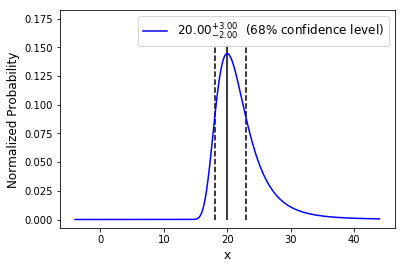

In [10]:
b.plot_pdf()

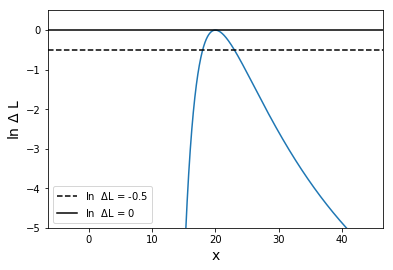

In [11]:
b.plot_log_likelihood()

You can generate random numbers using the object's PDF

In [15]:
b.generate_random()

array(22.31143114)

## Propagating confidence intervals for user-defined functions

The package has suport to propagation of assymetirc uncertanties in more roboust functions, an exemple is shown here.



we want to measure the value of 

d = $arctan\left ( \frac{   3 \times  10^{+0.5}_{-1.0}  }{ 5 \times 20^{+3.0}_{-2.0} } \right )$ 

together with its uncertantie at the same confidence level.

The "def function()" in which the errors will be propagated needs to be defined in a very specific format, the AsymmetricMeasurment 
parameters need to be given as the first parameter of the function, as a list, the other (float-like) parameters have to be the second parameter and be given as another list. The function need to return only one parameter. For the function above:	


In [9]:
def func(asymmetric_measurments , parameters ):
    as1, as2= asymmetric_measurments
    p1,p2 = parameters
    value = np.arctan(as1*p1) / (as2*p2)
    return value

The propagation is done with the Propagator() method, the first parameter is the function (func), the second and third are, respectively, the list of asyme objects and the list of float-like parameters, : 

In [13]:
d = asyme.Propagator(func, [a,b], [3,5] )

In [11]:
print(d)

Value = 1.47e-02 ( - 2.22e-03 , + 1.87e-03 )
(68% confidence level)


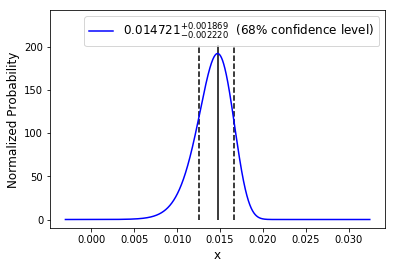

In [16]:
d.plot_pdf()

The propagation gives d = $0.0147^{+0.0018}_{-0.0022}$